Importing the depenedencies

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and analysis

In [31]:
insurance_dataset = pd.read_csv(r"C:\Users\Ayush\OneDrive\Desktop\30 Days 30 Projects\Machine-Learning-Projects\Medical Insurance\Data\insurance.csv")

In [32]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
insurance_dataset.shape

(1338, 7)

In [34]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:  
- Sex
- Smoker 
- Region

In [35]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
# Data analysis 
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

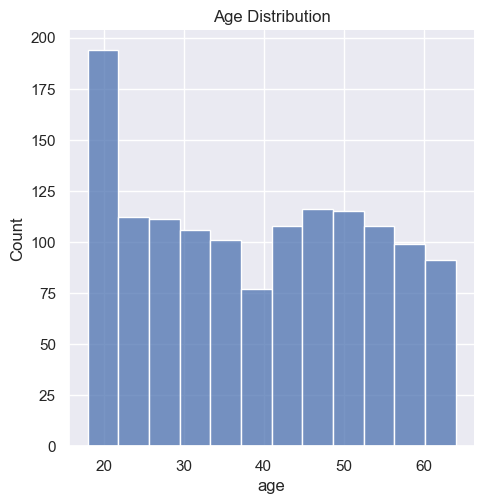

In [37]:
# distriubutioni of age value 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()


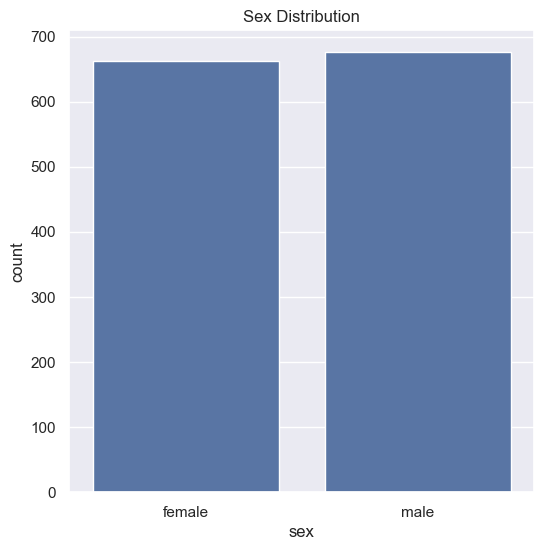

In [38]:
# distribution of Gender Column 
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [39]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

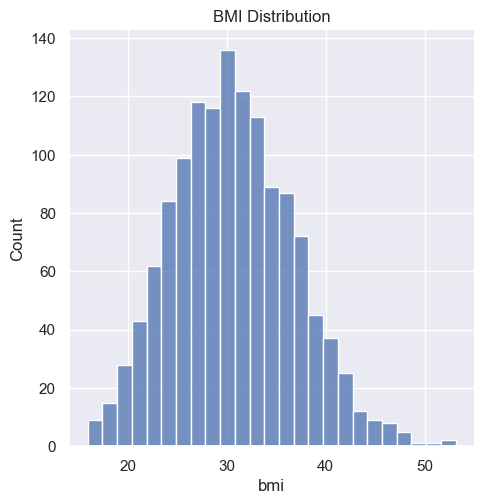

In [40]:
# BMI dsitribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Noraml BMI range : 18.5 to 24.9

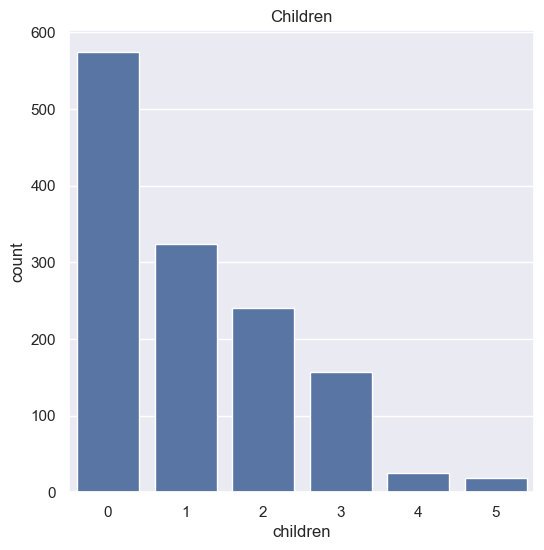

In [41]:
# children column 
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_dataset)
plt.title('Children')
plt.show()

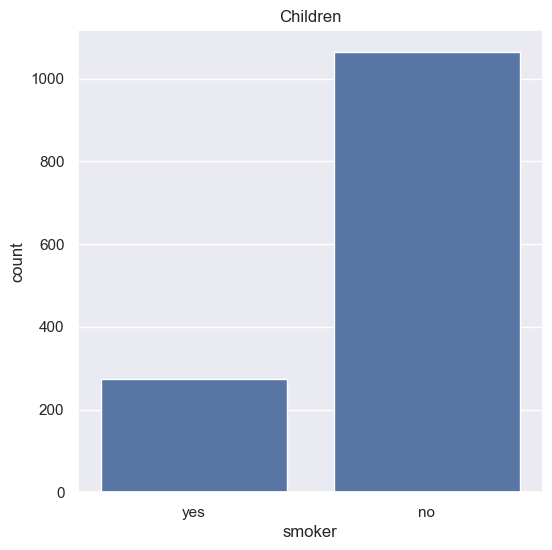

In [42]:
# smoker column 
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Children')
plt.show()

In [43]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

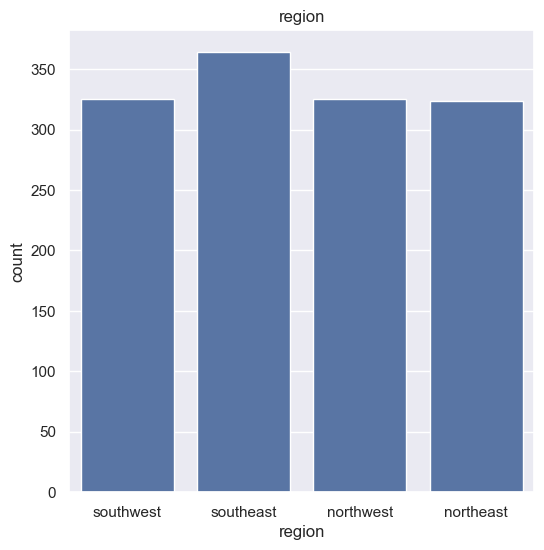

In [44]:
# region column 
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [45]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

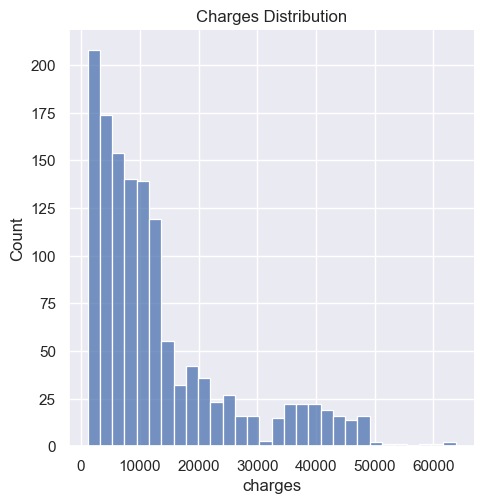

In [46]:
plt.figure(figsize=(6, 6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing  
Encoding the categorical features

In [47]:
#encoding 'sex' columns 
insurance_dataset.replace({'sex':{'male': 0, 'female':1}}, inplace=True)

# encoding 'smoker' columns 
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding 'regio' columns
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1,'northeast':2, 'northwest':3}}, inplace=True)



C:\Users\Ayush\AppData\Local\Temp\ipykernel_27988\612878876.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male': 0, 'female':1}}, inplace=True)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_27988\612878876.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_27988\612878876.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

In [48]:
# splitting the Features and Target
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [49]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [50]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [51]:
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [52]:
print(X.shape, X_train, X_test)

(1338, 6)       age  sex     bmi  children  smoker  region
882    21    1  22.135         0       1       2
505    37    0  30.875         3       1       3
798    58    1  33.100         0       1       1
792    22    1  23.180         0       1       2
201    48    1  32.230         1       1       0
...   ...  ...     ...       ...     ...     ...
466    60    1  28.700         1       1       1
299    48    1  28.880         1       1       3
493    61    0  43.400         0       1       1
527    51    1  25.800         1       1       1
1192   58    1  32.395         1       1       2

[1070 rows x 6 columns]       age  sex     bmi  children  smoker  region
17     23    0  23.845         0       1       2
1091   55    1  29.830         0       1       2
273    50    0  27.455         1       1       2
270    18    0  29.370         1       1       0
874    44    0  21.850         3       1       2
...   ...  ...     ...       ...     ...     ...
232    19    1  17.800         0  

In [53]:
regressor = LinearRegression()

In [54]:
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [58]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(f"R2 square value: {r2_train}")

R2 square value: 0.751505643411174


In [59]:
# prediction on test 
testing_data_prediction = regressor.predict(X_test)

In [60]:
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print(f"R2 square value: {r2_test}")

R2 square value: 0.7447273869684077


Prediction Model

In [61]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960496


c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
import pickle
with open("model.pkl","wb") as file:
    pickle.dump(regressor, file)